The data for this project was obtained and downloaded from scientific literature studies on Accurate prediction of a drug's aqueous solubility. The idea was not to replicate the study per se but to use the delaney dataset to build a simple DNN model that can predict the solubility of a drug compound. Find the paper attached here: https://www.sciencedirect.com/science/article/abs/pii/S0022286021016902?casa_token=_DdP4cRP5gYAAAAA:RtL685PFQC66cnCyk3H0RICxyHB5r-U4D1kImd6-v6SE7j5DuH-sZ5PTswmG0u3mW5YdxH8b

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

import tensorflow_addons as tfa



import os
from sklearn.preprocessing import normalize
from google.colab import drive
drive.mount('/content/drive')
data_directory = os.path.join("/content/drive/MyDrive/UNTHSC/Github_projects/delaney.csv") #this is the read directory, change as needed



#----------DATA READING
filename = "/content/drive/MyDrive/UNTHSC/Github_projects/delaney.csv"
# read file
csv_data = pd.read_csv(filename, sep=',')



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Mounted at /content/drive


In [ ]:
csv_data.head()

,id,R1,R2,SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [ ]:
#----------DATA CLEANUP
# Remove NaN values from the dataset

clean_data = csv_data.dropna()
print(clean_data.describe())



                R1           R2
count  1144.000000  1144.000000
mean     -3.057997    -2.994776
std       2.096502     1.686520
min     -11.600000    -9.702000
25%      -4.332250    -3.962250
50%      -2.870500    -2.889000
75%      -1.600000    -1.846750
max       1.580000     1.091000


In [ ]:
!pip install rdkit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 29.4 MB/s eta 0:00:00


# Generate molecular descriptors from mordred

In [ ]:
!pip install mordred


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.5 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176720 sha256=d233670ddb731c7f1b76ff480d8f02b07f7bf004da7424c88ac0f5d6086ca007
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-c

In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from mordred import Calculator, descriptors
calc=Calculator(descriptors, ignore_3D=True)
len(calc.descriptors)

1613

In [ ]:
# A function used to generate the molecular descriptors of compounds using their SMILES string

def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]

    #name of the pandas dataframe is df_desc
    df_desc = calc.pandas(mols)
    return df_desc

In [ ]:
mordred_descriptors = All_Mordred_descriptors(clean_data['SMILES'])

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 1144/1144 [03:06<00:00,  6.14it/s]


In [ ]:
mordred_descriptors.shape

(1144, 1826)

In [ ]:
descriptor_delaney= mordred_descriptors

In [ ]:
descriptor_delaney.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,165.891061,20.736383,28,3,24.0,22.0,4.3125,1.375000
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,131.930033,16.491254,16,0,20.0,16.0,4.0625,1.000000
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,6.000000,2.000000,4.000000,6.000000,1.000000,2.610845,...,7.626083,30.698690,165.891061,20.736383,29,4,22.0,21.0,4.222222,1.444444
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,131.930033,16.491254,18,2,16.0,14.0,3.361111,1.333333
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,7.211103,2.302776,4.605551,7.211103,0.901388,2.947233,...,9.037771,36.999431,185.901768,23.237721,58,9,38.0,40.0,6.125,1.562500


In [ ]:
#add the Labels (Actual Solubility values) to the dataframe
descriptor_delaney['Solubility'] = clean_data['R1']
descriptor_delaney.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Solubility
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,31.665095,165.891061,20.736383,28,3,24.0,22.0,4.3125,1.375000,-2.18
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,29.418928,131.930033,16.491254,16,0,20.0,16.0,4.0625,1.000000,-2.00
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,6.000000,2.000000,4.000000,6.000000,1.000000,2.610845,...,30.698690,165.891061,20.736383,29,4,22.0,21.0,4.222222,1.444444,-1.74
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,27.254130,131.930033,16.491254,18,2,16.0,14.0,3.361111,1.333333,-1.48
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,7.211103,2.302776,4.605551,7.211103,0.901388,2.947233,...,36.999431,185.901768,23.237721,58,9,38.0,40.0,6.125,1.562500,-3.04


# Data cleaning and preprocessing

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply the normalization transformation to all columns
data_normalized = pd.DataFrame(scaler.fit_transform(descriptor_delaney), columns=descriptor_delaney.columns)

# Display the first few rows of the normalized DataFrame
print(data_normalized.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


   ABC  ABCGG  nAcid  nBase   SpAbs_A   SpMax_A  SpDiam_A    SpAD_A   SpMAD_A  \
0  NaN    NaN    0.0    0.0  0.082715  0.647590  0.679120  0.082715  0.673221   
1  NaN    NaN    0.0    0.0  0.056862  0.624390  0.654790  0.056862  0.555365   
2  NaN    NaN    0.0    0.0  0.085293  0.624390  0.654790  0.085293  0.694207   
3  NaN    NaN    0.0    0.0  0.074294  0.576861  0.604947  0.074294  0.725620   
4  NaN    NaN    0.0    0.0  0.102510  0.718915  0.753917  0.102510  0.625749   

    LogEE_A  ...    TSRW10        MW       AMW     WPath      WPol  Zagreb1  \
0  0.452245  ...  0.278614  0.196049  0.281254  0.001874  0.026549  0.07500   
1  0.409693  ...  0.258206  0.151621  0.213145  0.001071  0.000000  0.06250   
2  0.448615  ...  0.269834  0.196049  0.281254  0.001941  0.035398  0.06875   
3  0.401297  ...  0.238537  0.151621  0.213145  0.001205  0.017699  0.05000   
4  0.527307  ...  0.327080  0.222228  0.321386  0.003882  0.079646  0.11875   

    Zagreb2  mZagreb1  mZagreb2  Solub

In [ ]:
file_path = "/content/drive/MyDrive/UNTHSC/Github_projects/descriptor_delaney.csv"
data_normalized.to_csv(file_path, index=False)

In [ ]:
filename = "/content/drive/MyDrive/UNTHSC/Github_projects/descriptor_delaney.csv"
new_data = pd.read_csv(filename, sep=',')


In [ ]:

#Converting strings to NaN values
def convert_to_nan(value):
    try:
        return pd.to_numeric(value)
    except (ValueError, TypeError):
        return pd.NA
new_data = new_data.applymap(lambda x: convert_to_nan(x) if x != new_data.columns.name else x)
print(new_data)




      ABC  ABCGG  nAcid  nBase   SpAbs_A   SpMax_A  SpDiam_A    SpAD_A  \
0     NaN    NaN    0.0    0.0  0.082715  0.647590  0.679120  0.082715   
1     NaN    NaN    0.0    0.0  0.056862  0.624390  0.654790  0.056862   
2     NaN    NaN    0.0    0.0  0.085293  0.624390  0.654790  0.085293   
3     NaN    NaN    0.0    0.0  0.074294  0.576861  0.604947  0.074294   
4     NaN    NaN    0.0    0.0  0.102510  0.718915  0.753917  0.102510   
...   ...    ...    ...    ...       ...       ...       ...       ...   
1139  NaN    NaN    0.0    0.0  0.272636  0.693908  0.727692  0.272636   
1140  NaN    NaN    0.0    0.0  0.305509  0.784596  0.797736  0.305509   
1141  NaN    NaN    0.0    0.0  0.418608  0.774888  0.812615  0.418608   
1142  NaN    NaN    0.0    0.0  0.385848  0.761030  0.798083  0.385848   
1143  NaN    NaN    0.0    0.0  0.216244  0.711309  0.745941  0.216244   

       SpMAD_A   LogEE_A  ...    TSRW10        MW       AMW     WPath  \
0     0.673221  0.452245  ...  0.27861

In [ ]:
#Removal of descriptor columns with NaN values (at least one)(strings were converted to NaN)

desc_clean = new_data.dropna(axis=1)
desc_clean.head()



,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,Solubility
0,0.0,0.0,0.082715,0.647590,0.679120,0.082715,0.673221,0.452245,0.312020,0.325192,...,0.660474,0.278614,0.196049,0.281254,0.001874,0.026549,0.07500,0.055138,0.120953,0.714719
1,0.0,0.0,0.056862,0.624390,0.654790,0.056862,0.555365,0.409693,0.272170,0.372441,...,0.630319,0.258206,0.151621,0.213145,0.001071,0.000000,0.06250,0.040100,0.087966,0.728376
2,0.0,0.0,0.085293,0.624390,0.654790,0.085293,0.694207,0.448615,0.317822,0.329534,...,0.630399,0.269834,0.196049,0.281254,0.001941,0.035398,0.06875,0.052632,0.127062,0.748103
3,0.0,0.0,0.074294,0.576861,0.604947,0.074294,0.725620,0.401297,0.274516,0.374548,...,0.564932,0.238537,0.151621,0.213145,0.001205,0.017699,0.05000,0.035088,0.117288,0.767830
4,0.0,0.0,0.102510,0.718915,0.753917,0.102510,0.625749,0.527307,0.388986,0.264595,...,0.747095,0.327080,0.222228,0.321386,0.003882,0.079646,0.11875,0.100251,0.137447,0.649469


In [ ]:
desc_clean.head()

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,Solubility
0,0.0,0.0,0.082715,0.647590,0.679120,0.082715,0.673221,0.452245,0.312020,0.325192,...,0.660474,0.278614,0.196049,0.281254,0.001874,0.026549,0.07500,0.055138,0.120953,0.714719
1,0.0,0.0,0.056862,0.624390,0.654790,0.056862,0.555365,0.409693,0.272170,0.372441,...,0.630319,0.258206,0.151621,0.213145,0.001071,0.000000,0.06250,0.040100,0.087966,0.728376
2,0.0,0.0,0.085293,0.624390,0.654790,0.085293,0.694207,0.448615,0.317822,0.329534,...,0.630399,0.269834,0.196049,0.281254,0.001941,0.035398,0.06875,0.052632,0.127062,0.748103
3,0.0,0.0,0.074294,0.576861,0.604947,0.074294,0.725620,0.401297,0.274516,0.374548,...,0.564932,0.238537,0.151621,0.213145,0.001205,0.017699,0.05000,0.035088,0.117288,0.767830
4,0.0,0.0,0.102510,0.718915,0.753917,0.102510,0.625749,0.527307,0.388986,0.264595,...,0.747095,0.327080,0.222228,0.321386,0.003882,0.079646,0.11875,0.100251,0.137447,0.649469


In [ ]:
file_path = "/content/drive/MyDrive/UNTHSC/Github_projects/desc_clean.csv"
desc_clean.to_csv(file_path, index=False)

In [ ]:
desc_clean = pd.read_csv(file_path, sep=',')

# Build a fully connected Multilayer Neural Network

In [ ]:
#----------TRAIN/TEST SPLIT
train_data = desc_clean.sample(frac=0.8) # take 80% randomly from the data for training
test_data = desc_clean.drop(train_data.index) # reserve the rest for testing


# separate out the y (results) from x (features)
x_train = train_data.drop('Solubility', axis=1)
y_train = train_data['Solubility']

# separate out the y (results) from x (features)
x_test = test_data.drop('Solubility', axis=1)
y_test = test_data['Solubility']


In [ ]:
print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
           count      mean       std  min       25%       50%       75%  max
nAcid     915.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
nBase     915.0  0.005464  0.068638  0.0  0.000000  0.000000  0.000000  1.0
SpAbs_A   915.0  0.235606  0.128775  0.0  0.135297  0.209502  0.320432  1.0
SpMax_A   915.0  0.701108  0.092565  0.0  0.655922  0.718915  0.766013  1.0
SpDiam_A  915.0  0.730225  0.093734  0.0  0.680700  0.750418  0.795857  1.0
...         ...       ...       ...  ...       ...       ...       ...  ...
WPath     915.0  0.030637  0.057980  0.0  0.004150  0.014123  0.040228  1.0
WPol      915.0  0.170095  0.140322  0.0  0.061947  0.132743  0.256637  1.0
Zagreb1   915.0  0.205676  0.130631  0.0  0.106250  0.181250  0.293750  1.0
Zagreb2   915.0  0.190361  0.135122  0.0  0.085213  0.162907  0.276942  1.0
mZagreb2  915.0  0.271284  0.125561  0.0  0.174099  0.249236  0.354918  1.0

[1058 rows x 8 columns]
Test Data
           count      mean       std  

In [ ]:
print(len(x_train.keys()))

1058


In [ ]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 1 node in the output for the drug solubility
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

1058
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                33888     
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 34977 (136.63 KB)
Trainable params: 34977 (136.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit/Train model on training data
history = model.fit(x_train, y_train,
                    batch_size=30,
                    epochs=40,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/40
25/25 [==============================] - 5s 51ms/step - loss: 0.0506 - mae: 0.1647 - val_loss: 0.0186 - val_mae: 0.1181
Epoch 2/40
25/25 [==============================] - 0s 15ms/step - loss: 0.0171 - mae: 0.1057 - val_loss: 0.0097 - val_mae: 0.0752
Epoch 3/40
25/25 [==============================] - 0s 17ms/step - loss: 0.0147 - mae: 0.0955 - val_loss: 0.0093 - val_mae: 0.0801
Epoch 4/40
25/25 [==============================] - 0s 13ms/step - loss: 0.0130 - mae: 0.0913 - val_loss: 0.0253 - val_mae: 0.1457
Epoch 5/40
25/25 [==============================] - 0s 7ms/step - loss: 0.0127 - mae: 0.0927 - val_loss: 0.0041 - val_mae: 0.0517
Epoch 6/40
25/25 [==============================] - 0s 5ms/step - loss: 0.0114 - mae: 0.0867 - val_loss: 0.0138 - val_mae: 0.0926
Epoch 7/40
25/25 [==============================] - 0s 5ms/step - loss: 0.0110 - mae: 0.0864 - val_loss: 0.0065 - val_mae: 0.0640
Epoch 8/40
25/25 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 

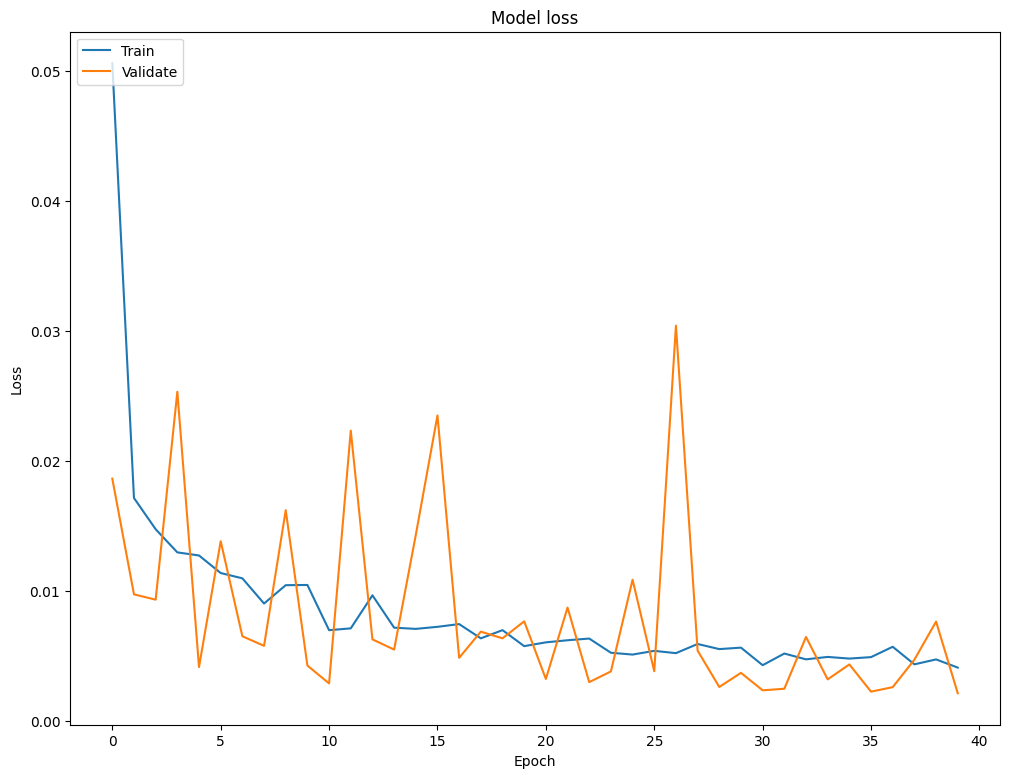

In [ ]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

8/8 - 0s - loss: 0.0027 - mae: 0.0394 - 32ms/epoch - 4ms/step
Loss: 0.0027106774505227804 MAE: 0.03940502554178238


In [ ]:
#--------PREDICT
p_test = model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [ ]:
print(y_test)

3       0.767830
6       0.755690
13      0.350531
20      0.614568
21      0.752656
          ...   
1124    0.443703
1128    0.572079
1130    0.449165
1134    0.732170
1139    0.966920
Name: Solubility, Length: 229, dtype: float64


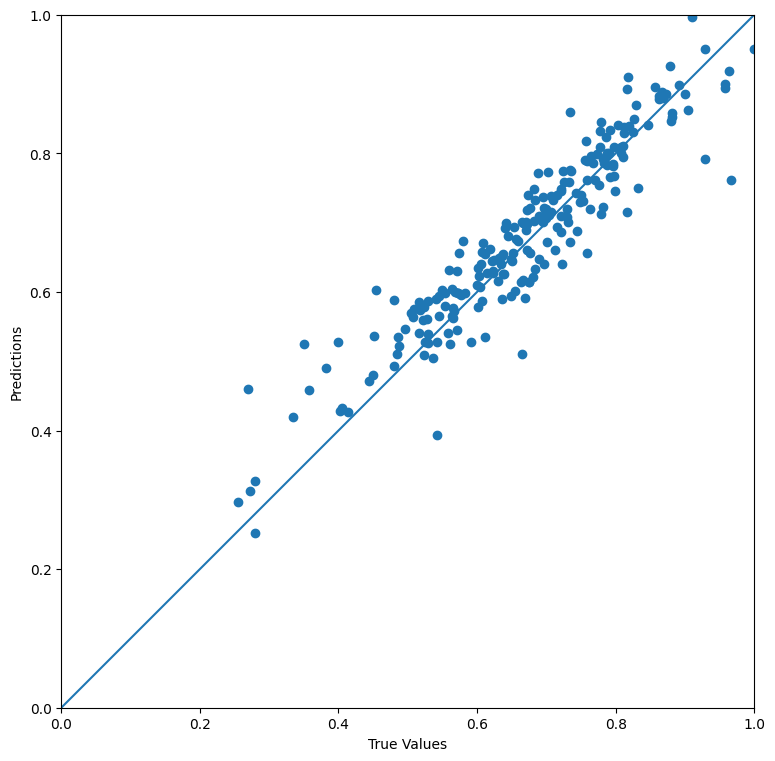

In [ ]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

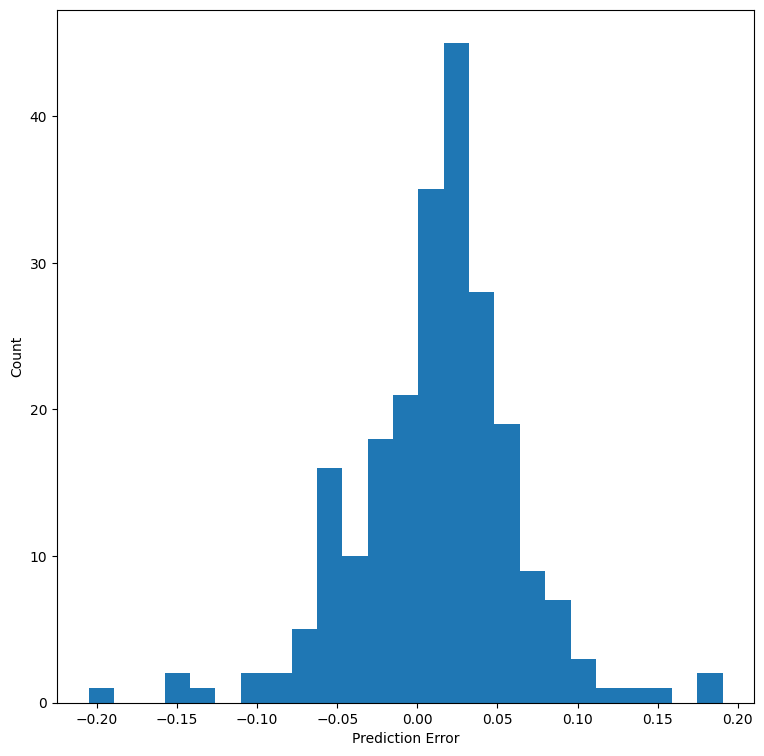

In [ ]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()